In [ ]:
from utils import *
from augmentation import *
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def plot_spectrogram(record, df):
    c = []
    for im in ['H1', 'L1']:
        sdf = df.loc[im]
        val = sdf.values
        var = val.var(axis=1) # spectrogram is transposed
        # val = np.square(np.abs(val)) / var.reshape((var.size,-1)) / val.shape[1]
        val = np.abs(val)
        # np.maximum(val[:,1:], val[:,:-1], val[:,1:])
        # np.maximum(val[:,:-1], val[:,1:], val[:,:-1])
        sdf = pd.DataFrame(val, index=sdf.index, columns=[f'{im}_{i}' for i in range(360)])
        sdf = sdf.groupby(lambda ts:int(ts)//(1800)).mean()
        sdf.sort_index(inplace=True)
        c.append(sdf)
    dfs = pd.concat(c, axis=1)
    dfs.fillna(0, inplace=True)
    c = [dfs.filter(regex=(f"{im}.*")).values for im in ['H1','L1']]
    print('.\b', end='')
    for x,n in zip(c,['H1', 'L1']):
        fig = plt.figure(figsize=figsize_all)
        plt.pcolormesh(x.T)
        # plt.axis('off')
        plt.xticks([])
        plt.xlabel('time', fontsize=18)
        plt.yticks([])
        plt.ylabel('frequency', fontsize=18)
        plt.savefig(f'plots/spectrogram/{record}_{n}.png')
        # plt.show()

def plot_viterbi(record, df):
    c = viterbi_2w(spectrogram_normalization(df))
    print('.\b', end='')
    for x,n in zip(c,['fw', 'bw']):
        fig = plt.figure(figsize=figsize_all)
        plt.pcolormesh(x)
        # plt.axis('off')
        plt.xticks([])
        plt.xlabel('time', fontsize=18)
        plt.yticks([])
        plt.ylabel('frequency', fontsize=18)
        plt.savefig(f'plots/viterbi/{record}_{n}.png')
        # plt.show()
        
def plot_sums(record, df):
    c = viterbi_2w(spectrogram_normalization(df))
    c = [x.sum(axis=1) for x in c]
    print('.\b', end='')
    for x,n in zip(c,['fw', 'bw']):
        fig = plt.figure(figsize=(figsize_all[0]/2,figsize_all[1]))
        plt.plot(x, range(360))
        plt.plot(np.ones(360)*x.max()/5, range(360))
        # plt.axis('off')
        plt.xticks([0], fontsize=8)
        plt.xlabel('intensity', fontsize=15)
        plt.yticks([])
        plt.ylabel('frequency', fontsize=18)
        plt.savefig(f'plots/sums/{record}_{n}.png')
        # plt.show()

def hshow(hough):
    """
    Show the result of hough line extraction
    """
    plt.imshow(hough[::-1, :, :], aspect='auto') # flip to match the other plots

def plot_hough(record, df):
    c = viterbi_2w(spectrogram_normalization(df))
    print('.\b', end='')
    r = []
    for x,n in zip(c,['fw', 'bw']):
        th, hough_v, hough_th, l = viterbi2hough(x)
        r.append((record,n,hough_th))
        # r.append(hough_v)
        # fig = plt.figure()
        # print(f'{hough_th.shape}\n', end='')
        # plt.imshow(hough_th[::-1, :, :], aspect='auto') # flip to match the other plots
        # # hshow(hough_th)
    return r

for x in readcgws(records, preprocess=plot_hough):
    for y in x[1]:
        plt.figure(figsize=figsize_all)
        hshow(y[2])
        # plt.axis('off')
        plt.xticks([])
        plt.xlabel('time', fontsize=18)
        plt.yticks([])
        plt.ylabel('frequency', fontsize=18)
        plt.savefig(f'plots/hough/{y[0]}_{y[1]}.png')

def plot_augmented(record, df):
    c = augment(spectrogram_normalization(df))
    print('.\b', end='')
    for x,n in zip(c,['H1', 'L1']):
        fig = plt.figure(figsize=figsize_all)
        plt.pcolormesh(x.T)
        # plt.axis('off')
        plt.xticks([])
        plt.xlabel('time', fontsize=18)
        plt.yticks([])
        plt.ylabel('frequency', fontsize=18)
        plt.savefig(f'plots/augm/{record}_{n}.png')
        # plt.show()

def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() - 0.022 # + float(space/10)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.2)
                value = '{:.3f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

Read, extract and save figures (spectrogram, viterbi, sums, hough, augmented)

In [ ]:
records = ['01bcf6533', '001121a05', '7e9d59d7c']
figsize_all = (6,4)
readcgws(records, preprocess=plot_spectrogram)
readcgws(records, preprocess=plot_viterbi)
readcgws(records, preprocess=plot_sums)
readcgws(records, preprocess=plot_hough)
readcgws(records[-1:], preprocess=plot_augmented)

Plot feature importances

/home/ms/miniconda3/envs/malis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


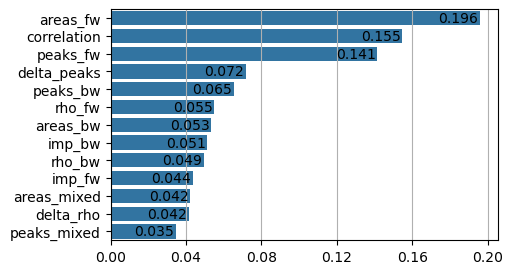

In [78]:
# feature names
a = ['peaks_fw', 'areas_fw', 'rho_fw', 'imp_fw', 'peaks_bw', 'areas_bw', 'rho_bw', 'imp_bw', 'delta_rho', 'correlation', 'peaks_mixed', 'areas_mixed', 'delta_peaks']

# importances
b = [0.14138452, 0.19578308, 0.05501073, 0.04361567, 0.06540681, 0.05334271, 0.0492897 , 0.05126184, 0.04161818, 0.15468196, 0.03472801, 0.04219746, 0.07167934]

x, y = tuple(zip(*sorted(zip(b,a), reverse=True)))
fig = plt.figure(figsize=(5,3))
p = sns.barplot(list(x), list(y), color='C0')
show_values(p, 'h')
plt.grid(axis='x')
plt.xticks([0,0.04, 0.08, 0.12, 0.16, 0.2])
# plt.xticks([0, 0.02, 0.04, 0.06, 0.08, 0.10, 0.12, 0.14, 0.16, 0.18, 0.2])
# plt.show()
plt.savefig('rf_importances.png')
plt.savefig('rf_importances.svg')